In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

from sklearn.metrics import *
from sklearn.preprocessing import *
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import *
from sklearn.feature_selection import *
from imblearn.under_sampling import EditedNearestNeighbours
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("UCI_Credit_Card.csv")

In [3]:
df.head(5)

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
df.describe().T

count           mean            std       min  \
ID                          30000.0   15000.500000    8660.398374       1.0   
LIMIT_BAL                   30000.0  167484.322667  129747.661567   10000.0   
SEX                         30000.0       1.603733       0.489129       1.0   
EDUCATION                   30000.0       1.853133       0.790349       0.0   
MARRIAGE                    30000.0       1.551867       0.521970       0.0   
AGE                         30000.0      35.485500       9.217904      21.0   
PAY_0                       30000.0      -0.016700       1.123802      -2.0   
PAY_2                       30000.0      -0.133767       1.197186      -2.0   
PAY_3                       30000.0      -0.166200       1.196868      -2.0   
PAY_4                       30000.0      -0.220667       1.169139      -2.0   
PAY_5                       30000.0      -0.266200       1.133187      -2.0   
PAY_6                       30000.0      -0.291100       1.149988      -2.0   
BILL_AMT1                   30000.0   51223.330900   73635.860576 -165580.0   
BILL_AMT2                   30000.0   49179.075167   71173.768783  -69777.0   
BILL_AMT3                   30000.0   47013.154800   69349.387427 -157264.0   
BILL_AMT4                   30000.0   43262.948967   64332.856134 -170000.0   
BILL_AMT5                   30000.0   40311.400967   60797.155770  -81334.0   
BILL_AMT6                   30000.0   38871.760400   59554.107537 -339603.0   
PAY_AMT1                    30000.0    5663.580500   16563.280354       0.0   
PAY_AMT2                    30000.0    5921.163500   23040.870402       0.0   
PAY_AMT3                    30000.0    5225.681500   17606.961470       0.0   
PAY_AMT4                    30000.0    4826.076867   15666.159744       0.0   
PAY_AMT5                    30000.0    4799.387633   15278.305679       0.0   
PAY_AMT6                    30000.0    5215.502567   17777.465775       0.0   
default.payment.next.month  30000.0       0.221200       0.415062       0.0   

                                 25%       50%        75%        max  
ID                           7500.75   15000.5   22500.25    30000.0  
LIMIT_BAL                   50000.00  140000.0  240000.00  1000000.0  
SEX                             1.00       2.0       2.00        2.0  
EDUCATION                       1.00       2.0       2.00        6.0  
MARRIAGE                        1.00       2.0       2.00        3.0  
AGE                            28.00      34.0      41.00       79.0  
PAY_0                          -1.00       0.0       0.00        8.0  
PAY_2                          -1.00       0.0       0.00        8.0  
PAY_3                          -1.00       0.0       0.00        8.0  
PAY_4                          -1.00       0.0       0.00        8.0  
PAY_5                          -1.00       0.0       0.00        8.0  
PAY_6                          -1.00       0.0       0.00        8.0  
BILL_AMT1                    3558.75   22381.5   67091.00   964511.0  
BILL_AMT2                    2984.75   21200.0   64006.25   983931.0  
BILL_AMT3                    2666.25   20088.5   60164.75  1664089.0  
BILL_AMT4                    2326.75   19052.0   54506.00   891586.0  
BILL_AMT5                    1763.00   18104.5   50190.50   927171.0  
BILL_AMT6                    1256.00   17071.0   49198.25   961664.0  
PAY_AMT1                     1000.00    2100.0    5006.00   873552.0  
PAY_AMT2                      833.00    2009.0    5000.00  1684259.0  
PAY_AMT3                      390.00    1800.0    4505.00   896040.0  
PAY_AMT4                      296.00    1500.0    4013.25   621000.0  
PAY_AMT5                      252.50    1500.0    4031.50   426529.0  
PAY_AMT6                      117.75    1500.0    4000.00   528666.0  
default.payment.next.month      0.00       0.0       0.00        1.0

In [7]:
df.duplicated().any()

False

In [8]:
df.rename(columns={'PAY_0': 'PAY_1'}, inplace = True)
df['MARRIAGE'] = np.where(df['MARRIAGE'] == 0, 3, df['MARRIAGE'])

In [9]:
df.columns = [x.lower() for x in df.columns]
df = df.rename(columns={"pay_0": "pay_1","default.payment.next.month":"default"})
col = df.columns.values
col_names = [str(i) for i in col]

In [10]:
df['grad_school'] = (df['education']==1).astype('int')
df['university'] = (df['education']==2).astype('int')
df['high_school']= (df['education']==3).astype('int')
df['others']= (df['education']==4).astype('int')
df['others']= (df['education']==5).astype('int')
df['others']= (df['education']==6).astype('int')
df['others']= (df['education']==0).astype('int')
df.drop('education',axis=1,inplace=True)

<AxesSubplot:>

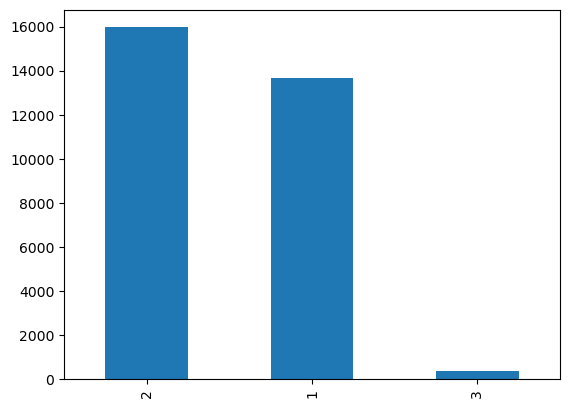

In [11]:
df['marriage'].value_counts().plot(kind = 'bar')

In [12]:
df.describe().T

count           mean            std       min       25%  \
id           30000.0   15000.500000    8660.398374       1.0   7500.75   
limit_bal    30000.0  167484.322667  129747.661567   10000.0  50000.00   
sex          30000.0       1.603733       0.489129       1.0      1.00   
marriage     30000.0       1.557267       0.521405       1.0      1.00   
age          30000.0      35.485500       9.217904      21.0     28.00   
pay_1        30000.0      -0.016700       1.123802      -2.0     -1.00   
pay_2        30000.0      -0.133767       1.197186      -2.0     -1.00   
pay_3        30000.0      -0.166200       1.196868      -2.0     -1.00   
pay_4        30000.0      -0.220667       1.169139      -2.0     -1.00   
pay_5        30000.0      -0.266200       1.133187      -2.0     -1.00   
pay_6        30000.0      -0.291100       1.149988      -2.0     -1.00   
bill_amt1    30000.0   51223.330900   73635.860576 -165580.0   3558.75   
bill_amt2    30000.0   49179.075167   71173.768783  -69777.0   2984.75   
bill_amt3    30000.0   47013.154800   69349.387427 -157264.0   2666.25   
bill_amt4    30000.0   43262.948967   64332.856134 -170000.0   2326.75   
bill_amt5    30000.0   40311.400967   60797.155770  -81334.0   1763.00   
bill_amt6    30000.0   38871.760400   59554.107537 -339603.0   1256.00   
pay_amt1     30000.0    5663.580500   16563.280354       0.0   1000.00   
pay_amt2     30000.0    5921.163500   23040.870402       0.0    833.00   
pay_amt3     30000.0    5225.681500   17606.961470       0.0    390.00   
pay_amt4     30000.0    4826.076867   15666.159744       0.0    296.00   
pay_amt5     30000.0    4799.387633   15278.305679       0.0    252.50   
pay_amt6     30000.0    5215.502567   17777.465775       0.0    117.75   
default      30000.0       0.221200       0.415062       0.0      0.00   
grad_school  30000.0       0.352833       0.477859       0.0      0.00   
university   30000.0       0.467667       0.498962       0.0      0.00   
high_school  30000.0       0.163900       0.370191       0.0      0.00   
others       30000.0       0.000467       0.021598       0.0      0.00   

                  50%        75%        max  
id            15000.5   22500.25    30000.0  
limit_bal    140000.0  240000.00  1000000.0  
sex               2.0       2.00        2.0  
marriage          2.0       2.00        3.0  
age              34.0      41.00       79.0  
pay_1             0.0       0.00        8.0  
pay_2             0.0       0.00        8.0  
pay_3             0.0       0.00        8.0  
pay_4             0.0       0.00        8.0  
pay_5             0.0       0.00        8.0  
pay_6             0.0       0.00        8.0  
bill_amt1     22381.5   67091.00   964511.0  
bill_amt2     21200.0   64006.25   983931.0  
bill_amt3     20088.5   60164.75  1664089.0  
bill_amt4     19052.0   54506.00   891586.0  
bill_amt5     18104.5   50190.50   927171.0  
bill_amt6     17071.0   49198.25   961664.0  
pay_amt1       2100.0    5006.00   873552.0  
pay_amt2       2009.0    5000.00  1684259.0  
pay_amt3       1800.0    4505.00   896040.0  
pay_amt4       1500.0    4013.25   621000.0  
pay_amt5       1500.0    4031.50   426529.0  
pay_amt6       1500.0    4000.00   528666.0  
default           0.0       0.00        1.0  
grad_school       0.0       1.00        1.0  
university        0.0       1.00        1.0  
high_school       0.0       0.00        1.0  
others            0.0       0.00        1.0

In [13]:
num_col = ['limit_bal', 'age','bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']

<AxesSubplot:>

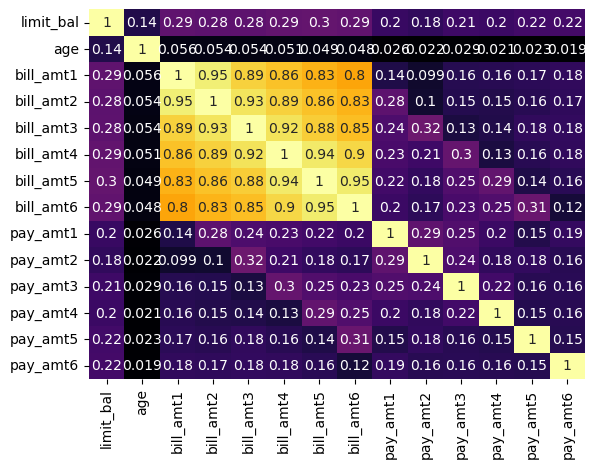

In [14]:
sns.heatmap(df[num_col].corr(),cbar=False,cmap = "inferno",annot=True)

## Data Preprocessing

In [15]:
age_bins = range(20, 85, 5)
age_labels = range(len(range(20, 85, 5)) - 1)
df['age'] = pd.cut(df['age'], bins=age_bins, labels=age_labels)

In [16]:
X=df.drop(['id','default'],axis=1)
y=df['default']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 2023)

<AxesSubplot:>

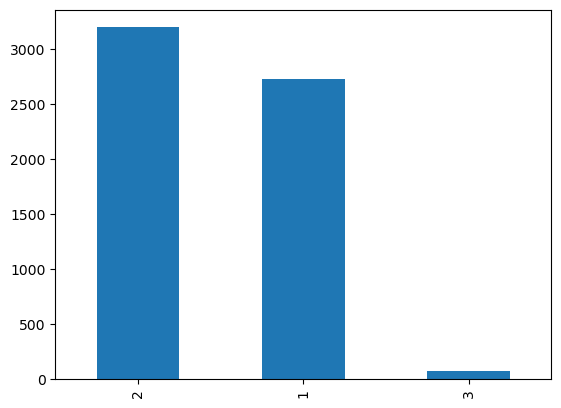

In [17]:
X_test.marriage.value_counts().plot(kind = 'bar')

In [18]:
num_col = ['limit_bal','bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4', 'bill_amt5', 'bill_amt6', 'pay_amt1',
       'pay_amt2', 'pay_amt3', 'pay_amt4', 'pay_amt5', 'pay_amt6']

cat_col = ['sex','age', 'grad_school', 'university', 'high_school', 'others', 'marriage', 'pay_1','pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']

In [19]:
transformer = ColumnTransformer([('scaled',PowerTransformer(),num_col)],remainder = 'passthrough')
transformer.fit(X_train)

columns = num_col + cat_col

X_train = pd.DataFrame(transformer.transform(X_train),columns = columns)
X_test = pd.DataFrame(transformer.transform(X_test),columns = columns)

In [20]:
X_test.marriage.value_counts()

 0.0    3261
-1.0    1144
-2.0     890
 2.0     637
 3.0      37
 4.0      13
 5.0      10
 7.0       7
 6.0       1
Name: marriage, dtype: int64

## Evaluation metric

**Since it is more important to identify the positive class of default we will be focussing on the area under the precision recall score to come up with the best model**

In [21]:
def score_metrics(y_true, y_prob):
    precision, recall, _ = precision_recall_curve(y_true, y_prob)
    return auc(recall, precision)

metric = make_scorer(score_metrics, needs_proba=True)

In [22]:
def ml_models():
    models, names = [], []
    
    models.append(LogisticRegression())
    names.append('LR')
    
    models.append(KNeighborsClassifier())
    names.append('KNN')
    
    models.append(GaussianNB())
    names.append('GNB')
    
    models.append(RandomForestClassifier())
    names.append('RF')
    
    models.append(XGBClassifier())
    names.append('XGB')
    
    models.append(LGBMClassifier())
    names.append('LGBM')
    
    return models, names

In [23]:
def evaluate(X, y):
    models, names = ml_models()
    results = []
    
    for model in models:
        cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=2023)
        scores = cross_val_score(model, X, y, scoring=metric, cv=cv)
        results.append(scores)
    
    plot_boxplot(results, names)

def plot_boxplot(results, names):
    fig = go.Figure()
    
    for result, name in zip(results, names):
        fig.add_trace(go.Box(y=result, name=name, boxmean=True))
    
    fig.update_layout(
        title="Box Plot",
        xaxis_title="Categories",
        yaxis_title="Values"
    )
    
    fig.show()

In [24]:
evaluate(X_train,y_train)

**`LightGBM` performs best among other algorithms.**

## Addressing Data Imbalance using undersampling

**To address class imbalance, we will utilize the `undersampling` technique. `Undersampling` involves removing examples from the majority class in the border area, thereby giving more emphasis to predictions in the minority class, which is of significant importance.**

In [25]:
resample = EditedNearestNeighbours()

X_resample,y_resample=resample.fit_resample(X_train,y_train)

evaluate(X_resample,y_resample)

**The application of data sampling techniques has resulted in a significant improvement in the performance of our models. Consequently, we will continue to utilize data sampling techniques in our analysis.**

In [26]:
X_train,y_train = X_resample, y_resample

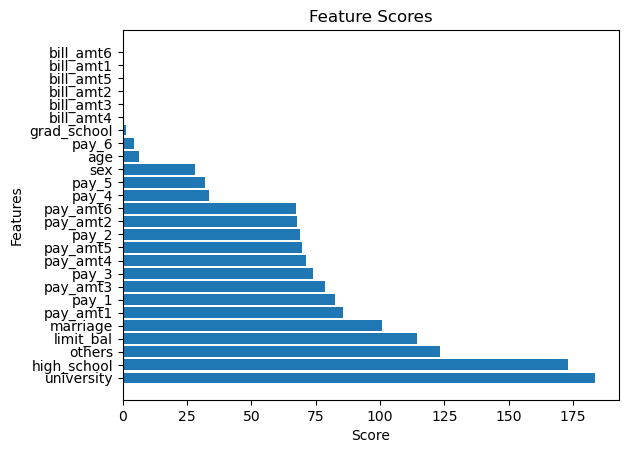

In [27]:
model = KNeighborsClassifier()

# Apply data preprocessing
scaler = MinMaxScaler()
X_resample_scaled = scaler.fit_transform(X_resample)

# Perform feature selection using SelectKBest and chi-square test
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X_resample_scaled, y_resample)

# Get feature scores
feature_scores = pd.Series(selector.scores_, index=X_resample.columns).sort_values(ascending=False)

# Plot feature scores
plt.barh(feature_scores.index, feature_scores.values)
plt.title("Feature Scores")
plt.xlabel("Score")
plt.ylabel("Features")
plt.show()

In [28]:
col = feature_scores.index
col = col.to_list()

In [29]:
results=[]

for i in range(8,23):
    model = KNeighborsClassifier()
    model.fit(X_train[col[:i]],y_train)
    y_prob = model.predict_proba(X_test[col[:i]])
    precision,recall,_= precision_recall_curve(y_test,y_prob[:,1])
    results.append(auc(recall,precision))

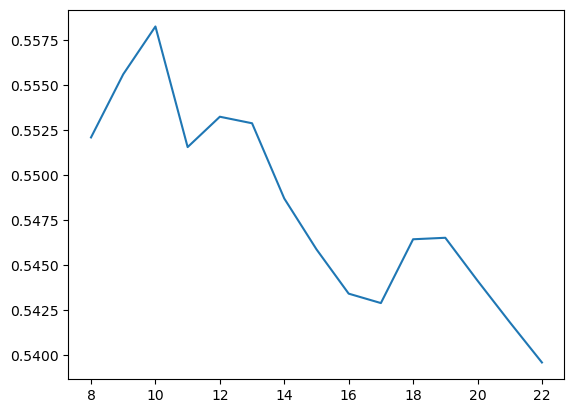

In [30]:
plt.plot([i for i in range(8,23)],results)

**For modeling purposes we are taking 10 features**

In [31]:
#feat = features_selected
feat = ['university', 'high_school', 'others', 'limit_bal', 'marriage', 'pay_amt1', 'pay_1', 'pay_amt3', 'pay_3', 'pay_amt4']

X_train= X_train[feat]
X_test= X_test[feat]

## Hyperparamter tuning

In [32]:
param_grid = {
    'n_neighbors': range(3, 8),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

cv = StratifiedKFold(n_splits=5)
model = GridSearchCV(KNeighborsClassifier(), param_grid, scoring=metric, n_jobs=-1, cv=cv)
model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(3, 8), 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             scoring=make_scorer(score_metrics, needs_proba=True))

In [33]:
model.best_params_

{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

In [34]:
model.best_score_

0.7737505292195948

In [35]:
model = model.best_estimator_
y_prob = model.predict_proba(X_test)

In [36]:
precision,recall,thresholds = precision_recall_curve(y_test,y_prob[:,1])
print(f'Area under precision_recall_curve: {auc(recall,precision)}')

Area under precision_recall_curve: 0.5580463768055488


Text(0, 0.5, 'Precision')

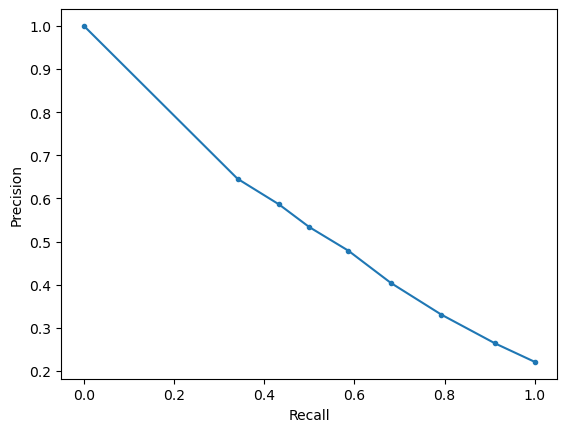

In [37]:
plt.plot(recall, precision, marker='.', label='KNeighborsClassifier')

plt.xlabel('Recall')
plt.ylabel('Precision')

## Threshold moving

**To move the threshold, we need to access the predicted probabilities or decision scores from the model and apply a custom threshold value.**

In [38]:
f1_score = (5*precision*recall)/(4*precision+recall)
ix = np.argmax(f1_score)
thresh=thresholds[ix]

print('Best Threshold=%f, f1_score=%.3f' % (thresholds[ix], f1_score[ix]))

Best Threshold=0.285714, f1_score=0.620


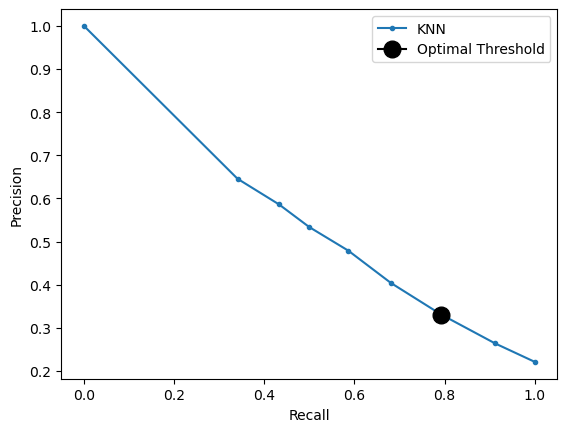

In [39]:
plt.plot(recall, precision, marker='.', label='KNN');
plt.plot(recall[ix],precision[ix],marker='o', markersize=12,color='black',label='Optimal Threshold');

plt.xlabel('Recall')
plt.ylabel('Precision')

plt.legend()

In [40]:
y_pred=(y_prob[:,1]>=thresh)

In [41]:
print(f'Classification_report: \n\n {classification_report(y_test,y_pred)}')

Classification_report: 

               precision    recall  f1-score   support

           0       0.90      0.54      0.68      4673
           1       0.33      0.79      0.47      1327

    accuracy                           0.60      6000
   macro avg       0.62      0.67      0.57      6000
weighted avg       0.78      0.60      0.63      6000



In [42]:
target = ['Non-Defaulter','Defaulted']
data = pd.DataFrame(confusion_matrix(y_test,y_pred),columns=target,index=target)

Text(120.72222222222221, 0.5, 'True Label')

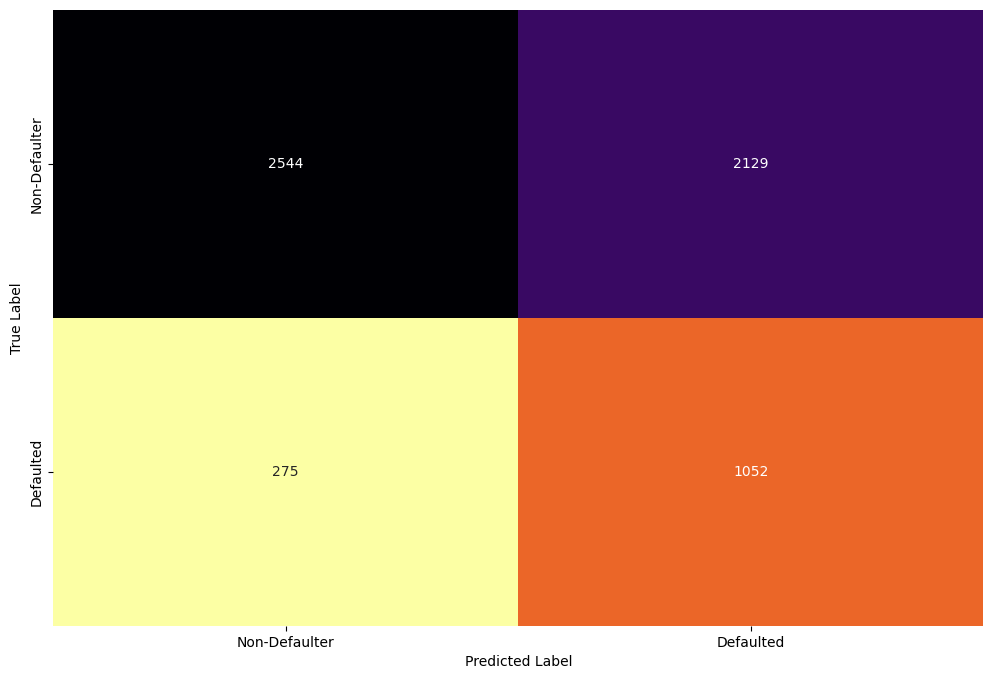

In [43]:
plt.figure(figsize=(12,8))

sns.heatmap(data,annot=True,cbar=False,cmap='inferno_r',fmt='g');
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

**We have been successful in decreasing the false negatives (defualters predicted as non-defaulters), achieving the recall of 0.79 for positive class**

- Decreasing false negatives (defaulter cases predicted as non-defaulters) can be crucial in scenarios where correctly identifying positive cases is of utmost importance.
- A recall of 0.79 indicates that the aforementioned model is effectively capturing a significant portion of the positive class instances, minimizing the number of false negatives. This means that approximately 79% of the actual positive cases are correctly identified by the model.

## Conclusions

- **The F1 score combines both precision and recall into a single metric, providing an overall measure of the model's performance. A higher F1 score indicates better performance in terms of both precision and recall, with a value of 1 representing perfect precision and recall.**

- **A precision of 0.33 suggests that out of all the positive predictions made by the model, only 33% are correct, while the remaining 67% are false positives. This implies that there is room for improvement in identifying true positive cases more accurately.**

## Recommendations

**To improve the precision and F1 score of the model, you may consider various approaches:**
- Adjust the classification threshold: Experiment with different threshold values to find the optimal balance between precision and recall. A higher threshold may increase precision but lower recall, and vice versa.
- Feature Engineering
- Explore different algorithms
- Gather more data